In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.linear_model import LinearRegression


# Filter out import warnings
warnings.filterwarnings("ignore", category=ImportWarning)

In [73]:
df = pd.read_csv('data/data.csv')

In [74]:
#check for missing values
df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew_Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [75]:
df['Dew_Point']

0        34
1        34
2        34
3        34
4        32
         ..
28815    38
28816    38
28817    38
28818    38
28819    38
Name: Dew_Point, Length: 28820, dtype: object

In [76]:
df['Dew_Point'].isnull().sum()


0

In [77]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.012515,-0.035097,-0.051014,-0.085274,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,0.096215,-0.093211,-0.088991,0.016871,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,0.001627,0.095943,0.127689,0.102289,0.024415,0.009621,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.011776,0.067718,0.044340,-0.064939,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.017198,-0.013440,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.015110,-0.010734,-0.009522,0.005692,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.003843,0.008063,-0.009887,-0.008285,-0.025621,0.495286,0.044864
DEP_TIME_M,0.002632,0.004446,0.008256,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,-0.005923,0.006033,-0.014336,-0.009410,0.025609,0.544197,0.057896
CRS_ARR_M,-0.012361,0.008519,-0.003339,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.033163,0.014180,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.054401,0.010603,-0.039487,-0.376730,-0.022534,0.075958,-0.067574


<Axes: >

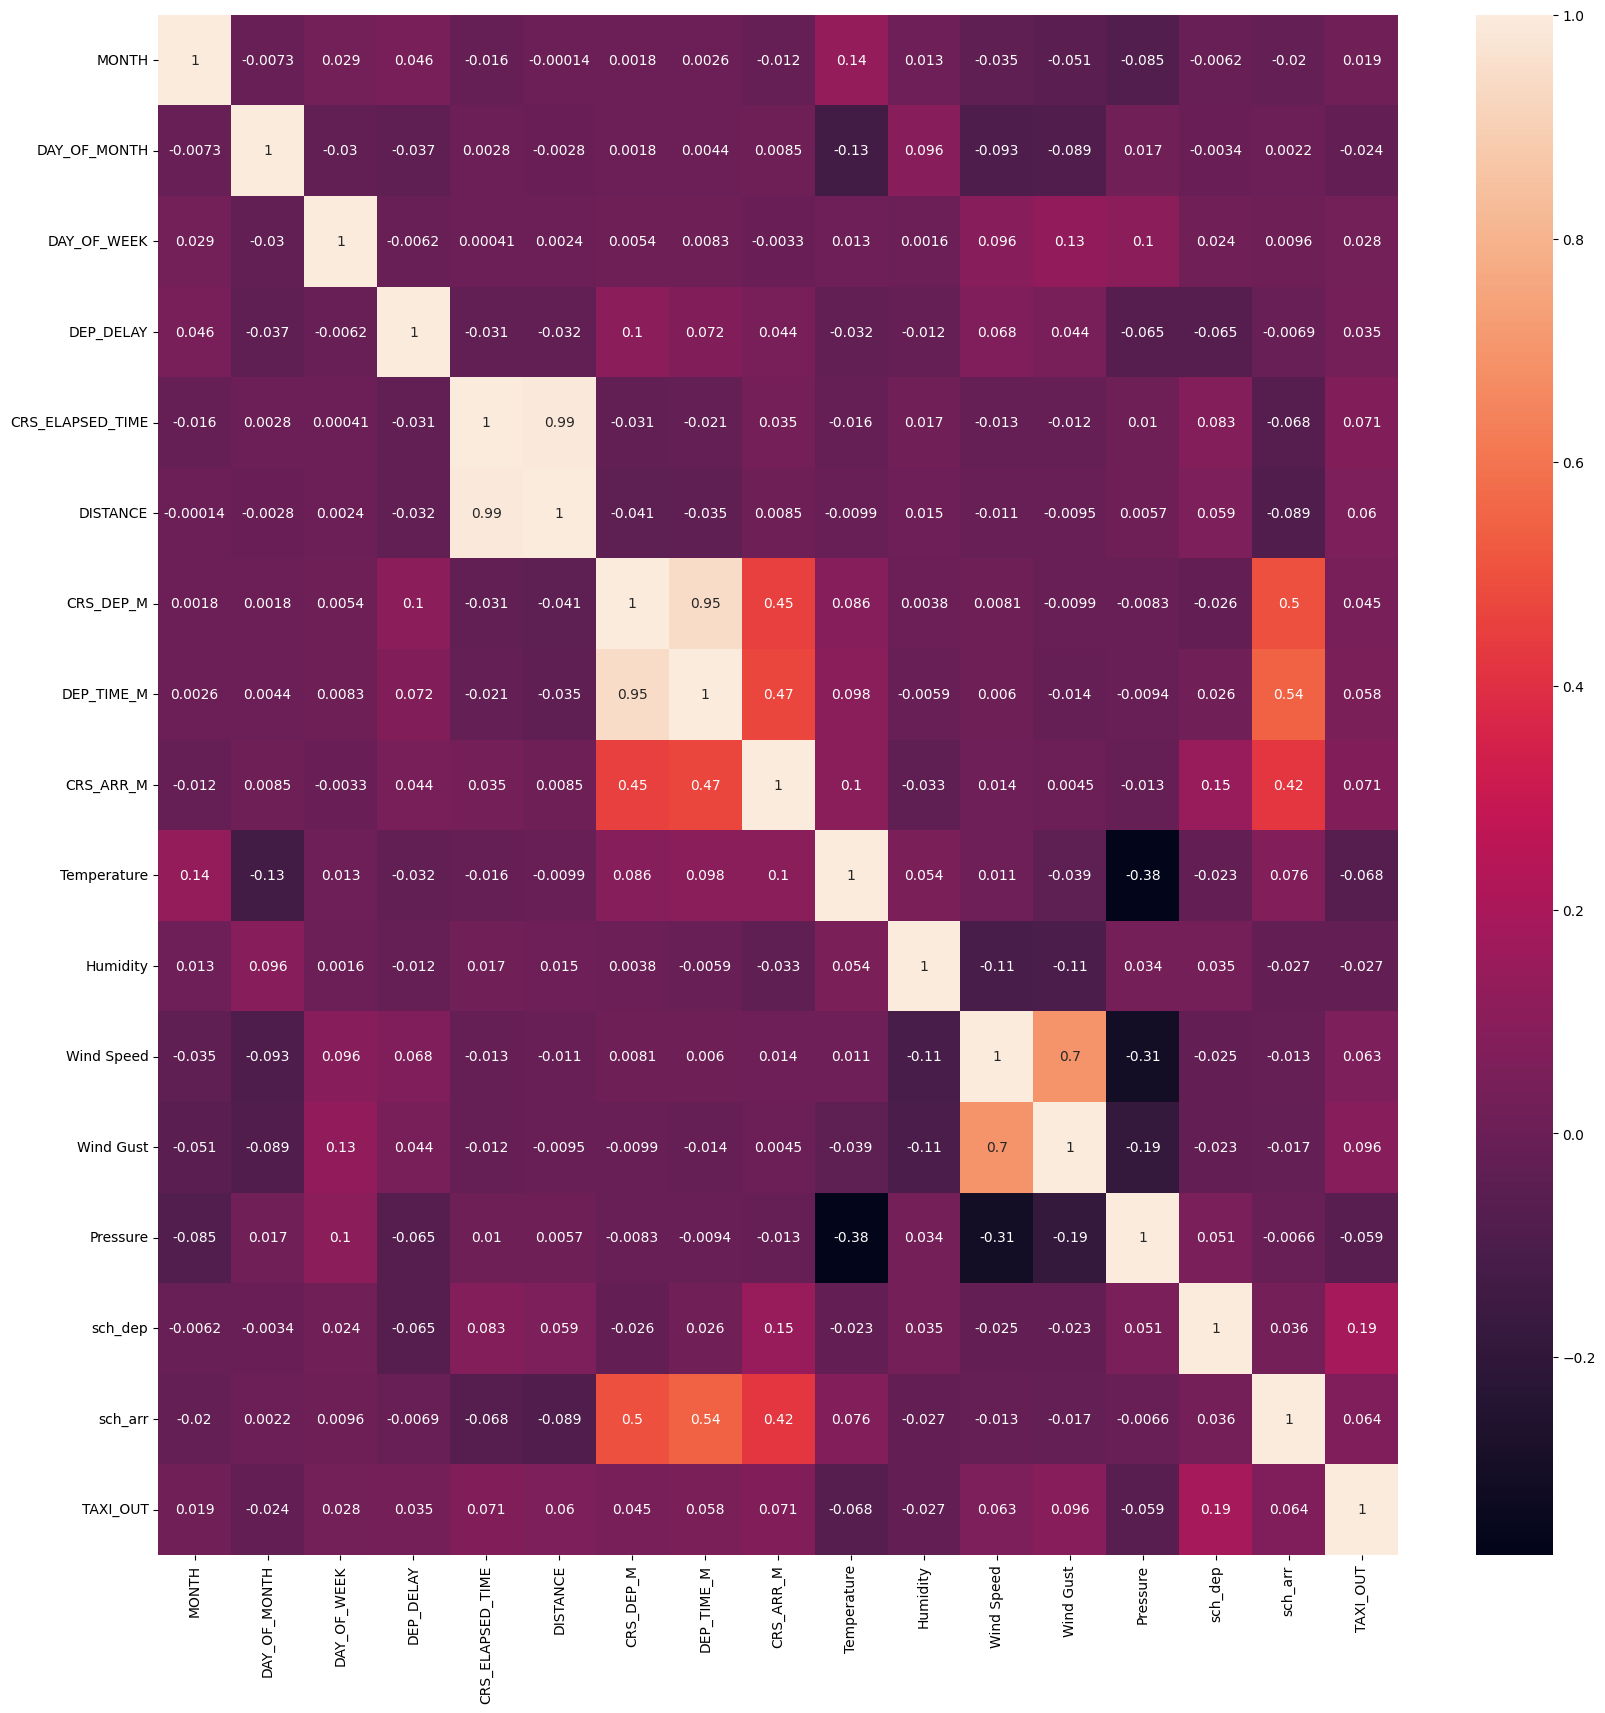

In [78]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, annot=True)

In [79]:
x = df.reindex(columns=['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew_Point', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr', 'TAXI_OUT'])
data_types = x.dtypes
print(data_types)

MONTH                 int64
DAY_OF_MONTH          int64
DAY_OF_WEEK           int64
DEP_DELAY             int64
CRS_ELAPSED_TIME      int64
DISTANCE              int64
CRS_DEP_M             int64
DEP_TIME_M            int64
CRS_ARR_M             int64
Temperature           int64
Dew_Point            object
Wind Gust             int64
Pressure            float64
sch_dep               int64
sch_arr               int64
TAXI_OUT              int64
dtype: object


In [80]:
x

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew_Point,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,-1,124,636,324,323,448,48,34,38,29.86,9,17,14
1,11,1,5,-7,371,2475,340,333,531,48,34,38,29.86,9,17,15
2,11,1,5,40,181,1069,301,341,482,48,34,38,29.86,9,17,22
3,11,1,5,-2,168,944,345,343,513,48,34,38,29.86,9,17,12
4,11,1,5,-4,139,760,360,356,499,46,32,35,29.91,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,2,57,150,1370,1372,1427,39,38,0,30.18,20,32,19
28816,1,31,5,2,75,187,1390,1392,25,39,38,0,30.18,19,23,22
28817,1,31,5,283,392,2422,1125,1408,1337,39,38,0,30.18,19,23,21
28818,1,31,5,5,224,1598,1417,1422,261,39,38,0,30.18,19,23,13


In [81]:
x['Dew_Point'].dtype

dtype('O')

In [82]:
x['Dew_Point'] = df['Dew_Point'].astype(float)

x['Dew_Point']



0        34.0
1        34.0
2        34.0
3        34.0
4        32.0
         ... 
28815    38.0
28816    38.0
28817    38.0
28818    38.0
28819    38.0
Name: Dew_Point, Length: 28820, dtype: float64

In [83]:
x['Dew_Point'].isnull().sum()


0

In [84]:
# mean_dew_point = x['Dew_Point'].mean()
# x['Dew_Point'] = x['Dew_Point'].fillna(mean_dew_point)

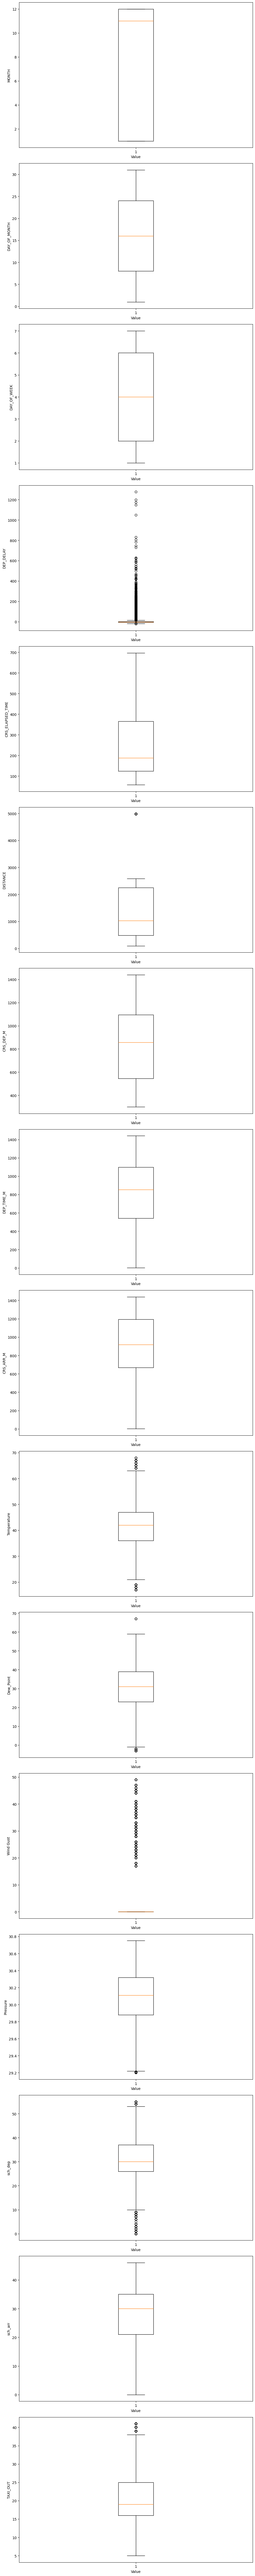

In [85]:
num_cols = len(x.columns)
fig, axes = plt.subplots(nrows=num_cols, figsize=(10, 100))
# # Create a boxplot for each column
for i, col in enumerate(x.columns):
    ax = axes[i]
    ax.boxplot(x[col])
    ax.set_ylabel(col)
    ax.set_xlabel('Value')

plt.tight_layout()
plt.show()

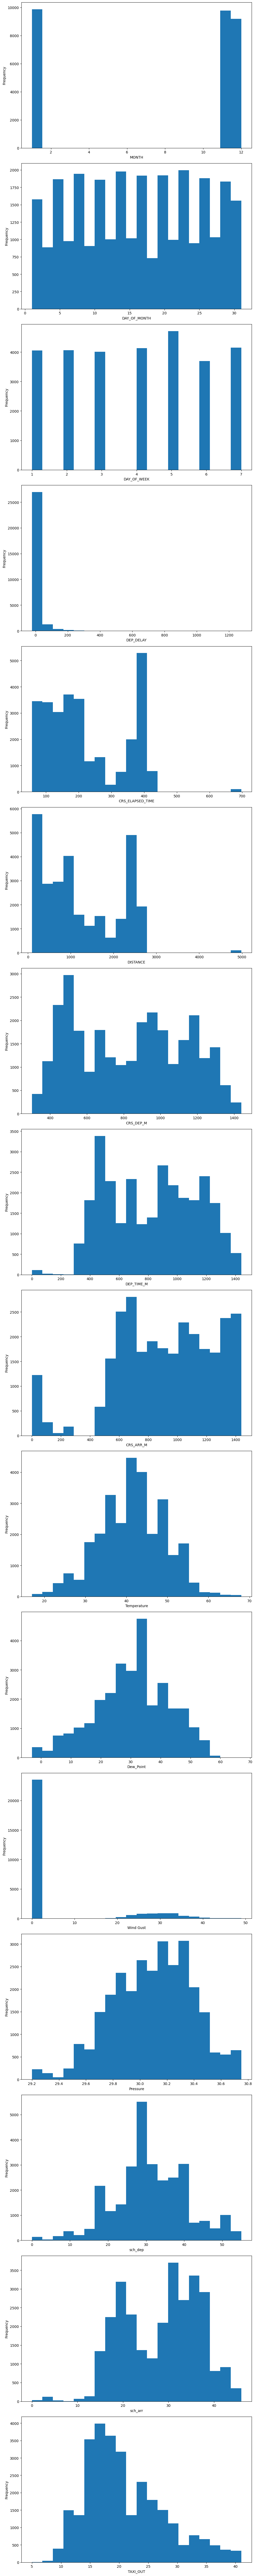

In [86]:
# Create a subplot grid based on the number of columns
num_cols = len(x.columns)
fig, axes = plt.subplots(nrows=num_cols, figsize=(10, 100))

# Create a histogram for each column
for i, col in enumerate(x.columns):
    ax = axes[i]
    ax.hist(x[col], bins=20)  # Adjust the number of bins as needed
    ax.set_ylabel('Frequency')  # Set the y-axis label
    ax.set_xlabel(col)  # Set the x-axis label to the column name

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

there are no continous value in some of the graphs

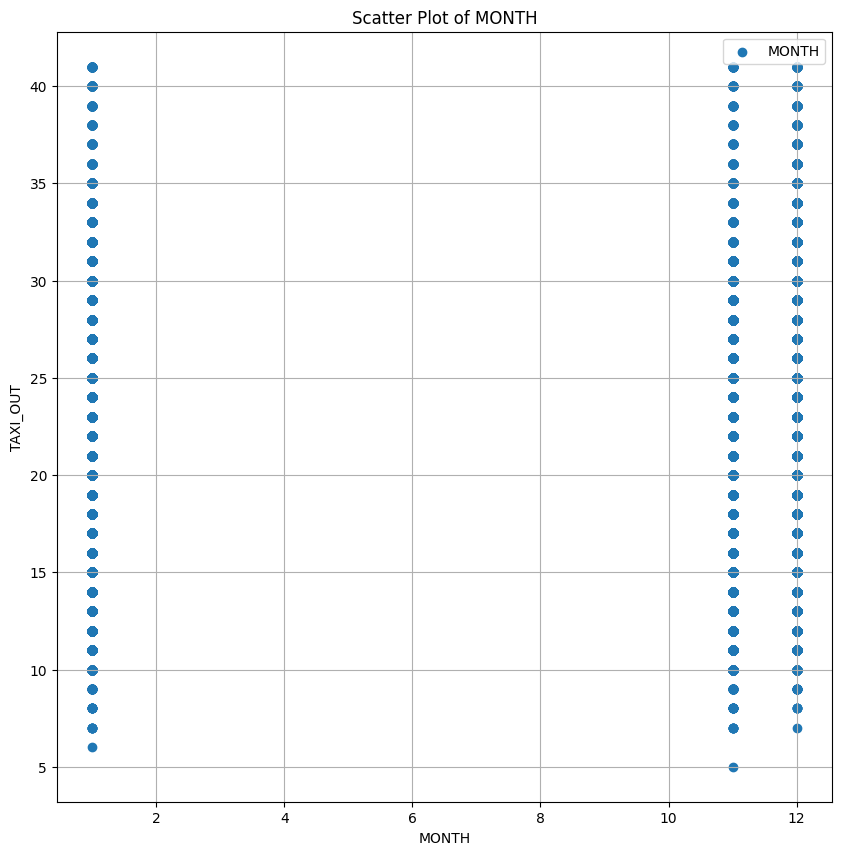

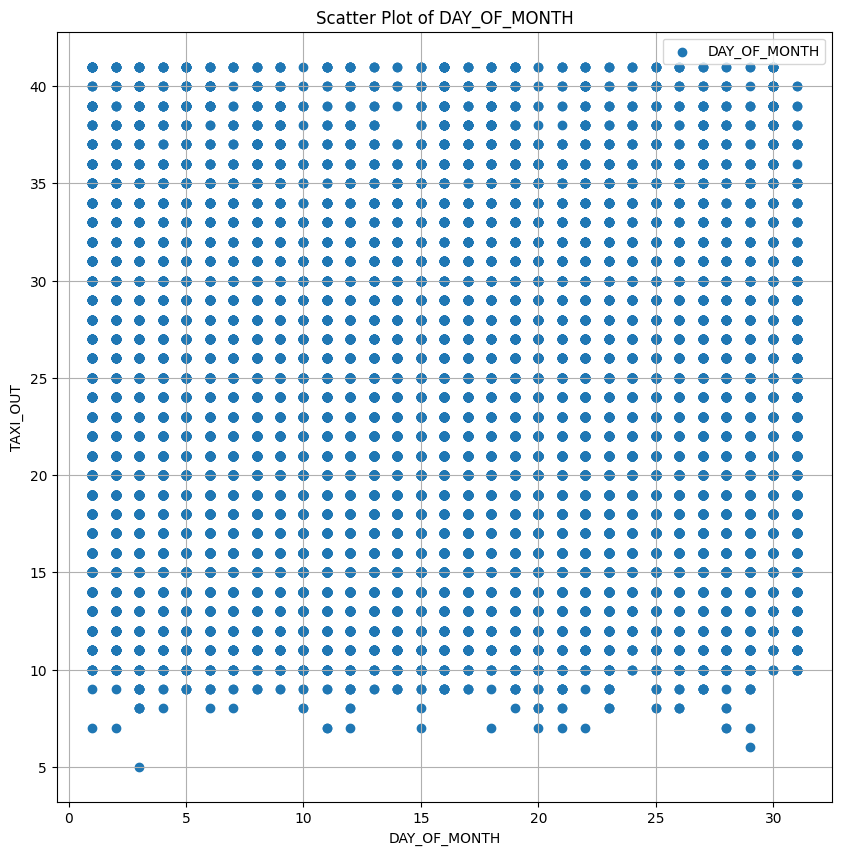

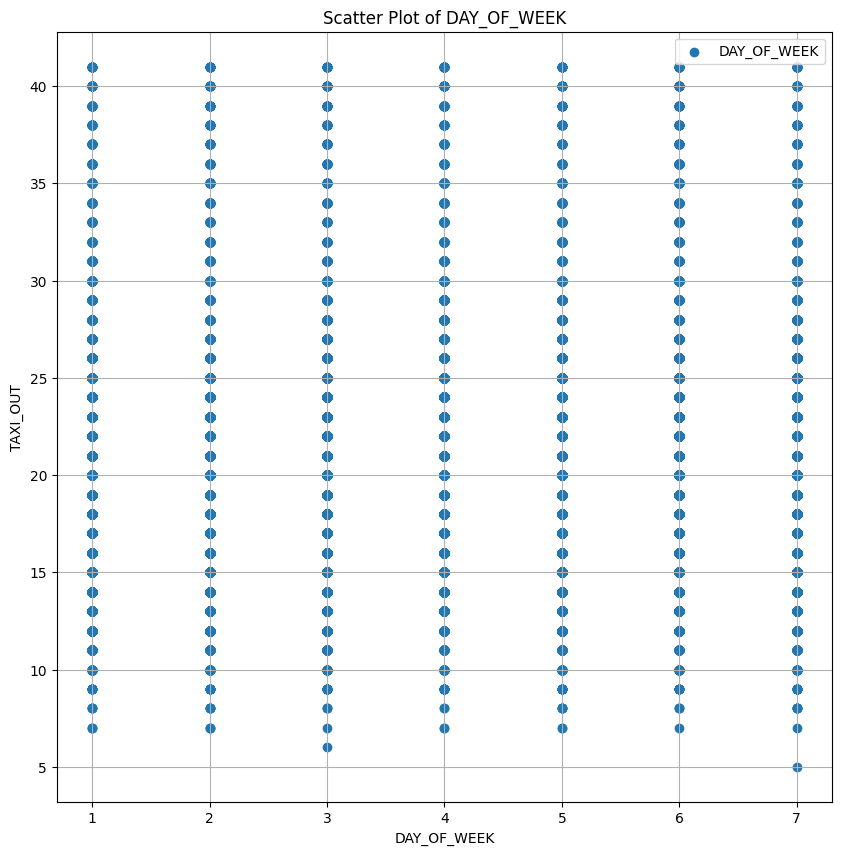

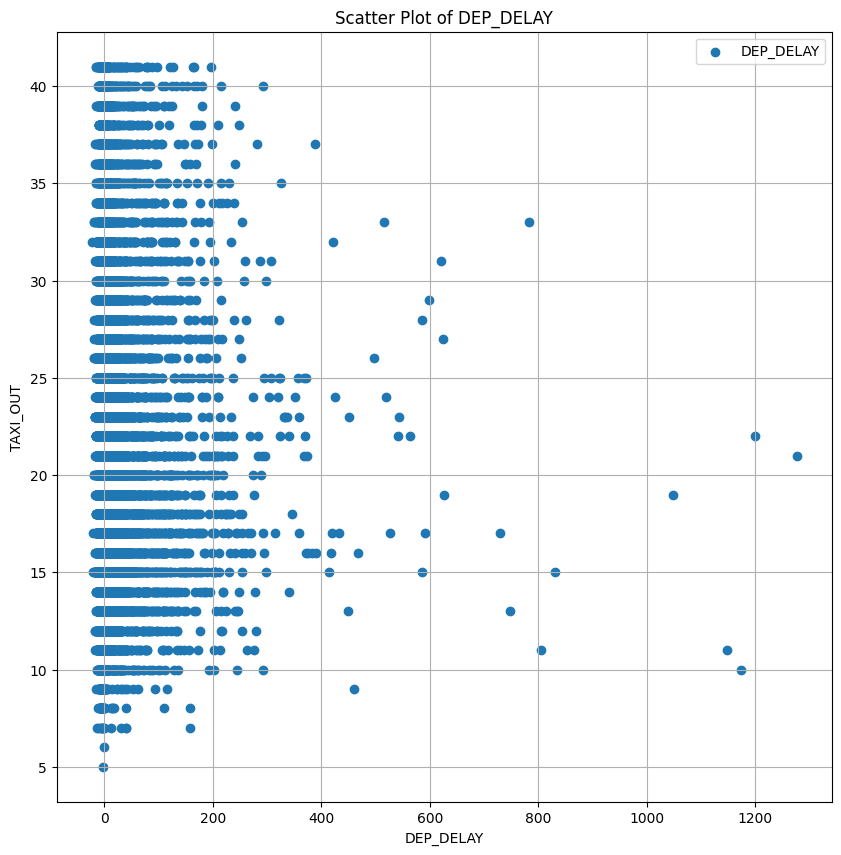

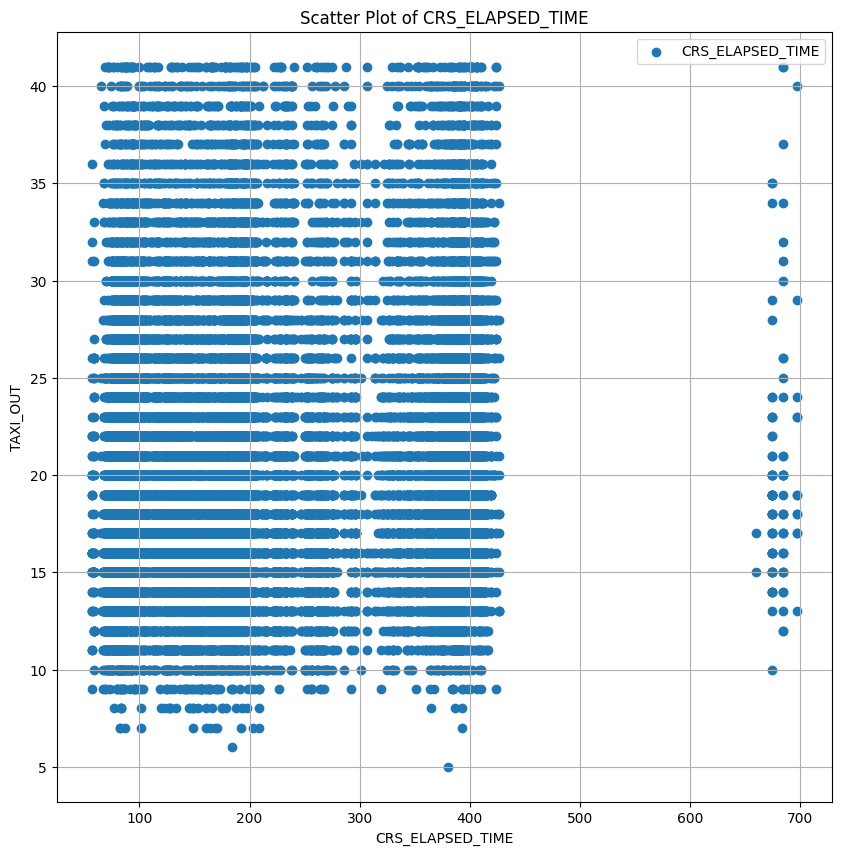

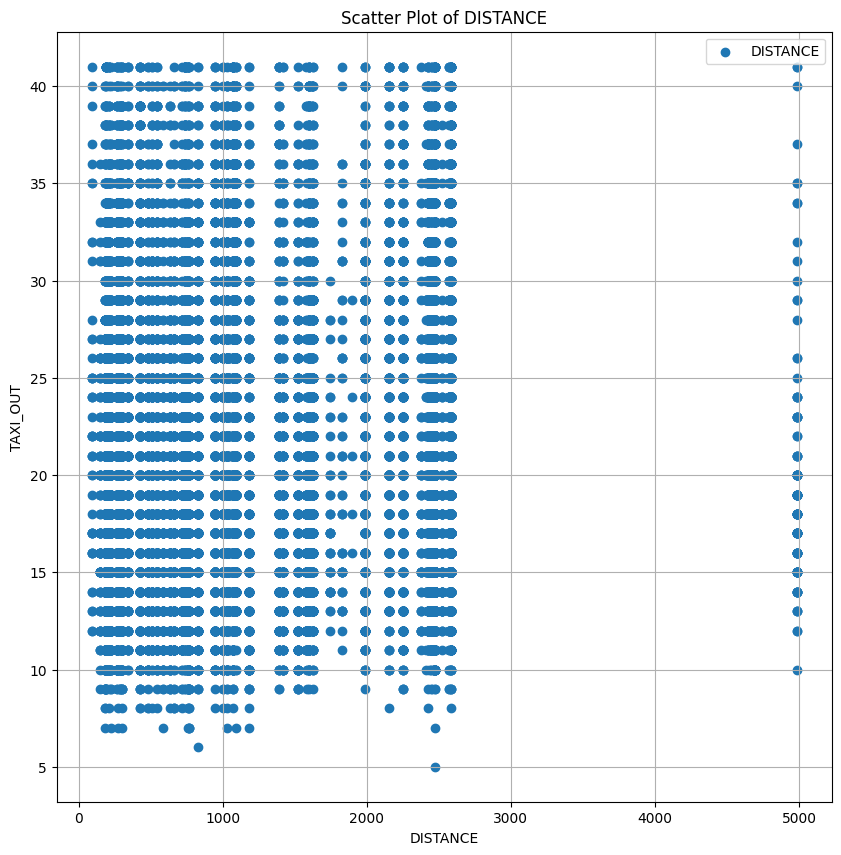

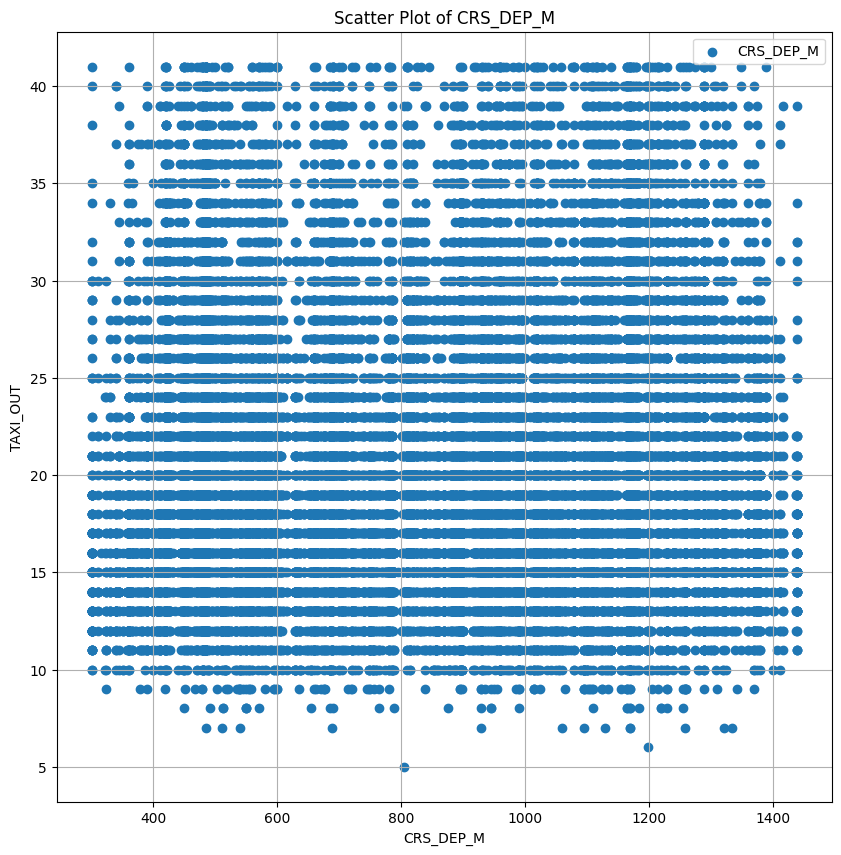

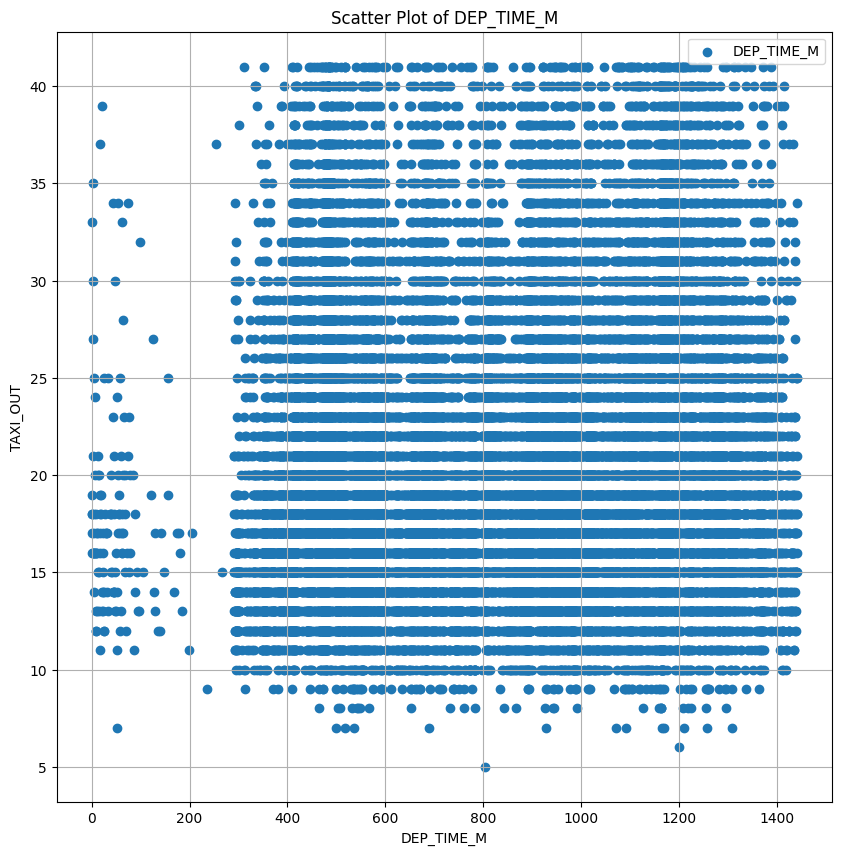

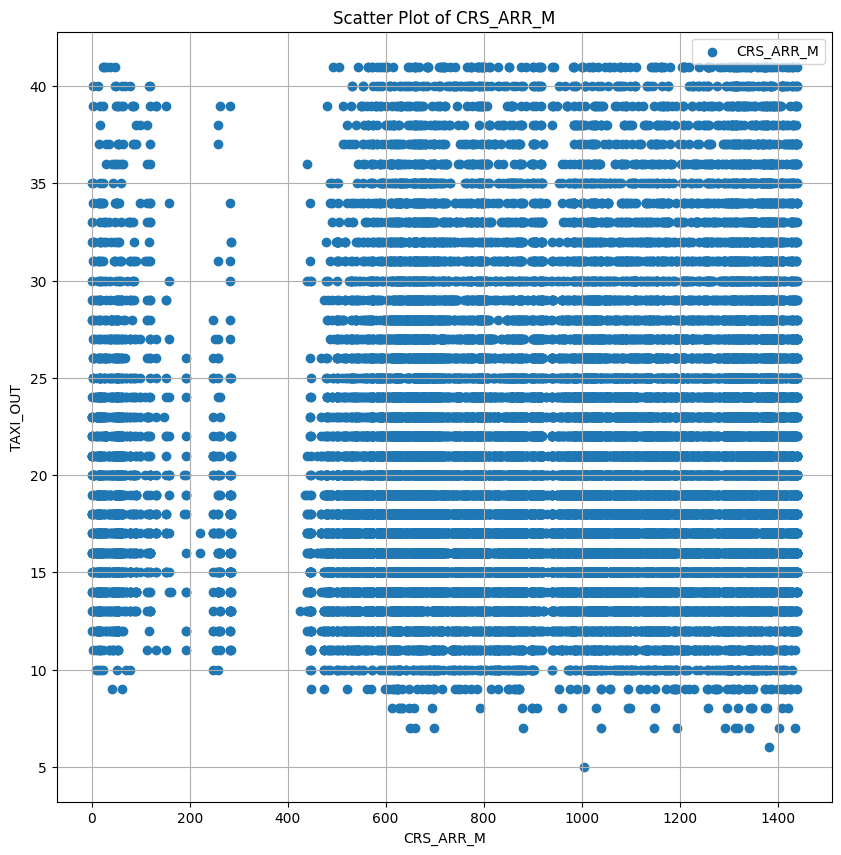

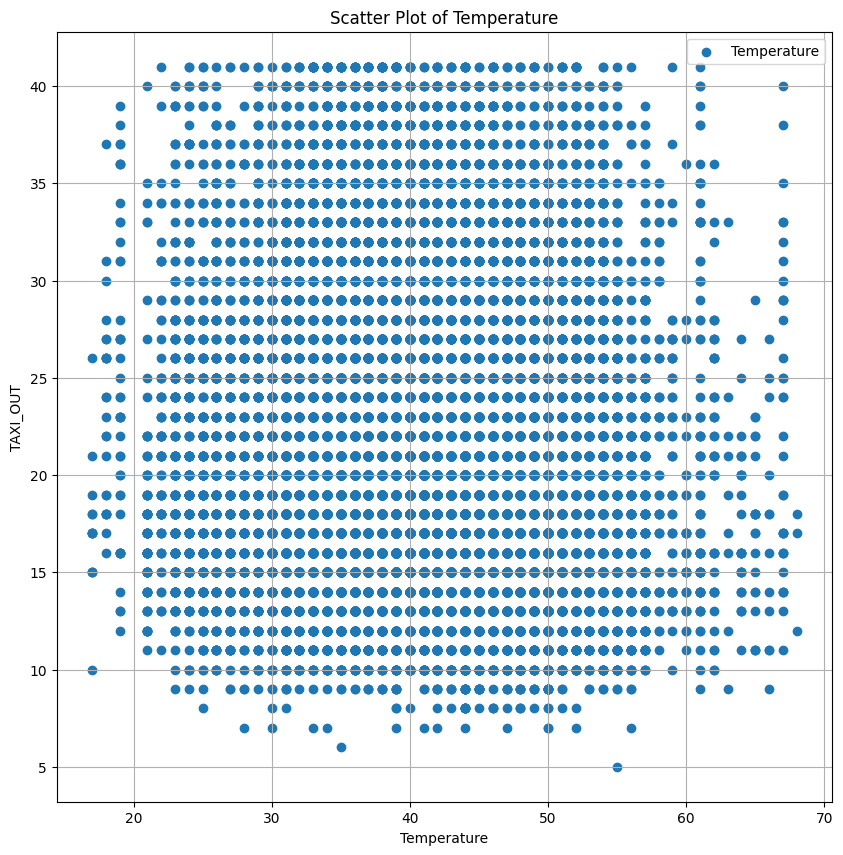

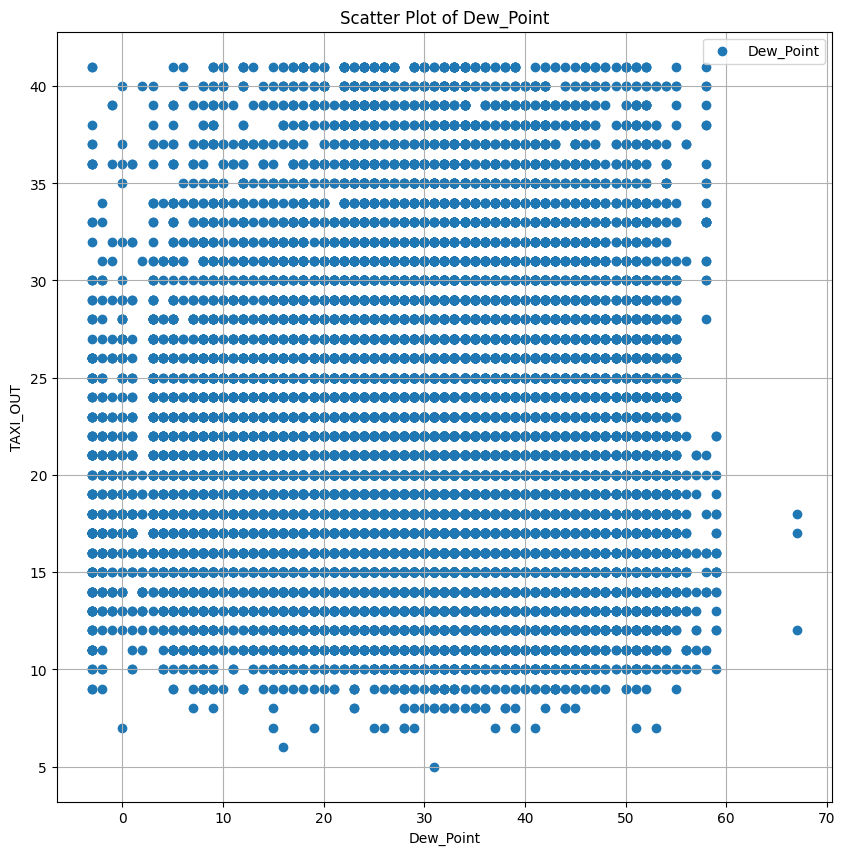

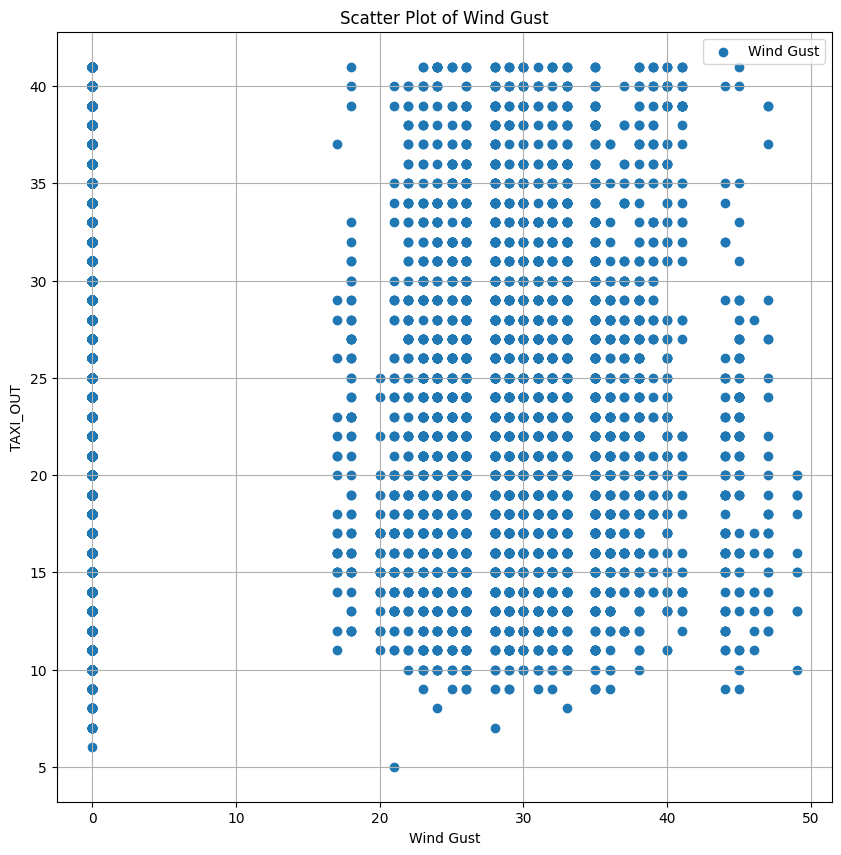

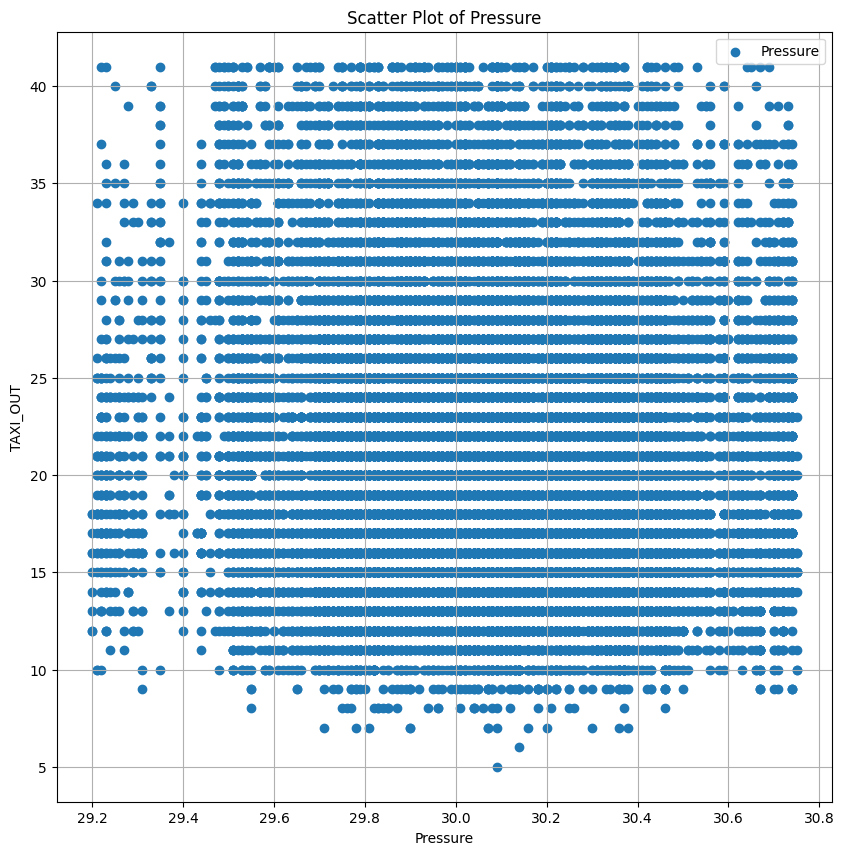

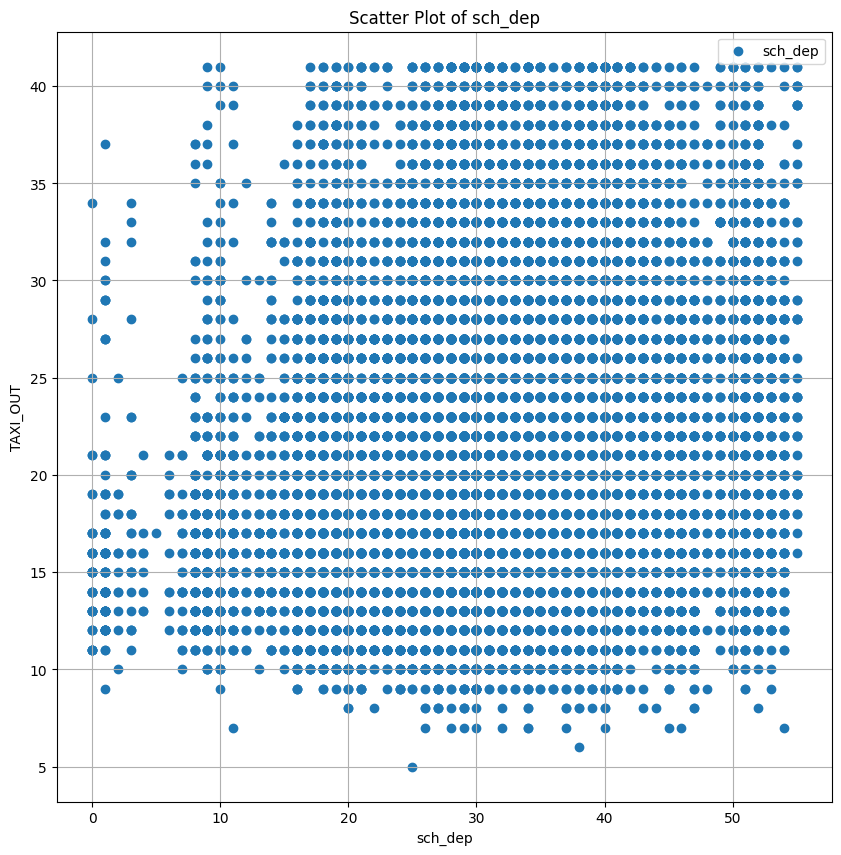

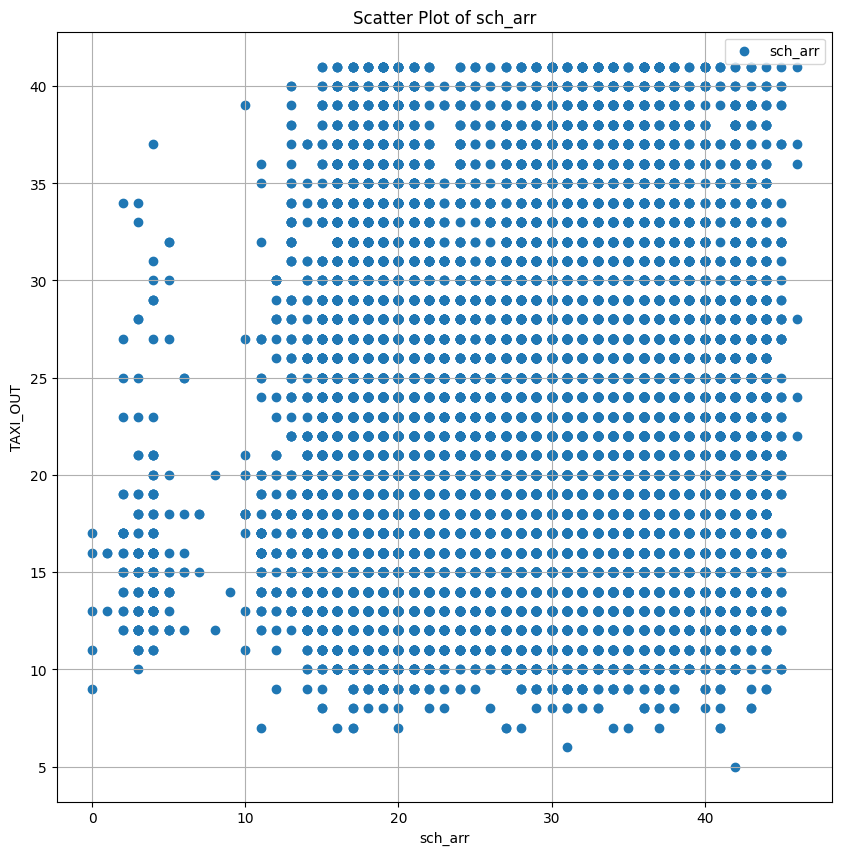

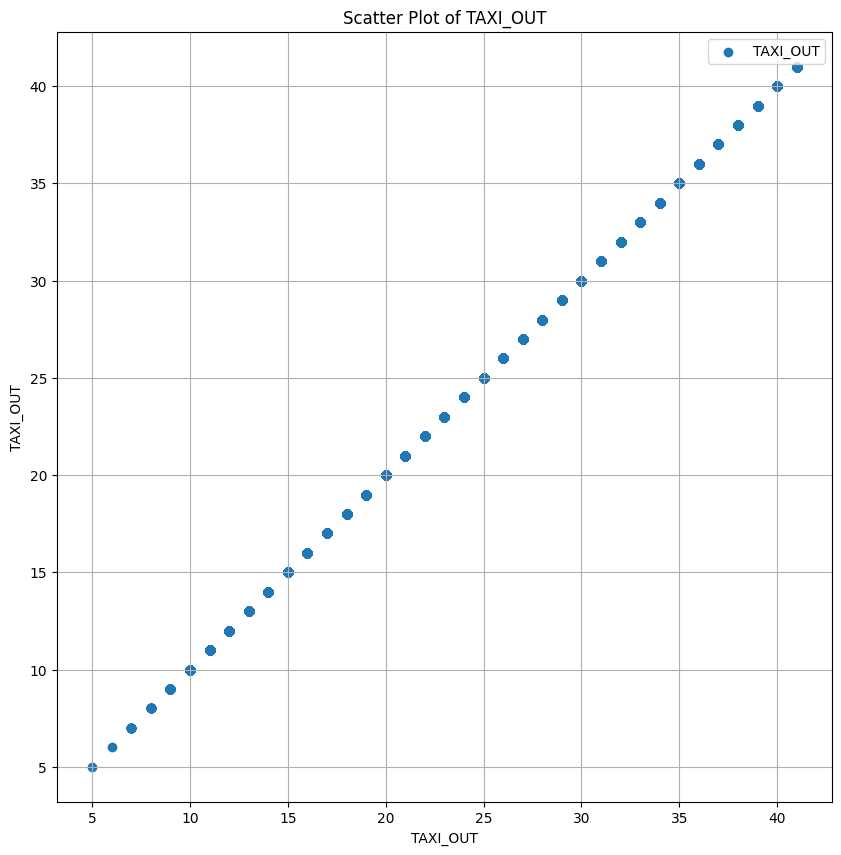

In [87]:
# Assuming x is your dataframe with columns to be plotted

# Create a scatter plot for each column on its own graph
for col in x.columns:
    plt.figure(figsize=(10, 10))  # Adjust figsize as needed
    plt.scatter(x[col], x['TAXI_OUT'], label=col)
    plt.ylabel('TAXI_OUT')  # Assuming the index is used as the x-axis
    plt.xlabel(col)  # Assuming the y-axis label
    plt.title(f'Scatter Plot of {col}')  # Title of the plot
    plt.legend()  # Show legend with column name
    plt.grid(True)  # Add grid lines
    plt.show()
